<a href="https://colab.research.google.com/github/jbastianrj/Dissimilarity-measures-for-time-series-clustering-/blob/main/portafolios2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install skfolio

In [ ]:
from plotly.io import show
from sklearn.model_selection import train_test_split

from skfolio import Population, RiskMeasure
from skfolio.cluster import HierarchicalClustering, LinkageMethod
#from skfolio.datasets import load_sp500_dataset
from skfolio.distance import (
    CovarianceDistance,
    DistanceCorrelation,
    KendallDistance,
    MutualInformation,
    NBinsMethod,
    PearsonDistance,
    SpearmanDistance,
)
from skfolio.optimization import (
    EqualWeighted,
    HierarchicalRiskParity,
    HierarchicalEqualRiskContribution,
    MeanRisk, ObjectiveFunction,
)
from skfolio.preprocessing import prices_to_returns

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
stocks_sp = pd.read_csv("adjusted_data_sp2.csv")
stocks_sp11 = pd.read_csv("adjusted_data_sp.csv")

In [ ]:
stocks_sp.head()

,Stock,level_1,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,0,2014-09-19,25.572500,25.587500,25.125000,25.240000,22.467148,283609600.0
1,AAPL,1,2014-09-22,25.450001,25.535000,25.145000,25.264999,22.489403,211153600.0
2,AAPL,2,2014-09-23,25.150000,25.735001,25.135000,25.660000,22.841013,253608800.0
3,AAPL,3,2014-09-24,25.540001,25.712500,25.299999,25.437500,22.642958,240687200.0
4,AAPL,4,2014-09-25,25.127501,25.177500,24.430000,24.467501,21.779516,400368000.0


In [ ]:
len(stocks_sp11)

41064

In [ ]:
# Crear una tabla pivote con las columnas 'Date' como índice, 'Stock' como columnas y 'Close' como valores
pivot_df = stocks_sp.pivot_table(index='Date', columns='Stock', values='Close')
pivot_df11 = stocks_sp11.pivot_table(index='Date', columns='Stock', values='Close')


In [ ]:
# Eliminamos el activo libre de riesgo solo sirve de comparacipon futura
pivot_df = pivot_df.drop(columns=['ZB=F'])
pivot_df11 = pivot_df11.drop(columns=['ZB=F'])

In [ ]:
len(pivot_df11)

3422

In [ ]:
pivot_df.head()

Stock,0941.HK,AAPL,AMZN,BABA,BHP,CVX,ECL,JNJ,JPM,MSFT,NESN.SW,NKE,NVDA,PFE,PG,SAN,T,TSLA,XOM
Date,,,,,,,,,,,,,,,,,,,
2014-09-19,96.400002,25.240000,16.566000,93.889999,56.476360,124.800003,118.070000,107.989998,61.110001,47.520000,70.400002,40.904999,4.7700,28.842505,84.470001,9.91,26.790030,17.288000,97.120003
2014-09-22,94.800003,25.264999,16.225000,89.889999,54.665478,123.489998,117.309998,107.879997,60.910000,47.060001,70.449997,40.355000,4.7225,28.633776,84.809998,9.85,26.812689,16.668667,96.540001
2014-09-23,95.099998,25.660000,16.181499,87.169998,54.834969,123.059998,116.769997,107.459999,60.939999,46.560001,69.750000,40.060001,4.7025,28.510435,84.440002,9.70,26.631420,16.694000,96.029999
2014-09-24,94.900002,25.437500,16.410500,90.570000,55.486172,122.400002,117.629997,108.639999,61.630001,47.080002,70.000000,40.419998,4.7300,28.757116,85.239998,9.75,26.737160,16.809334,95.820000
2014-09-25,94.099998,24.467501,16.096500,88.919998,53.496880,120.680000,115.639999,107.099998,60.150002,46.040001,69.449997,39.875000,4.6275,28.444023,84.330002,9.70,26.495468,16.463333,94.250000


In [ ]:
len(pivot_df)

2413

In [ ]:
len(pivot_df11)

3422

Cálculo de retornos con función de skfolio

In [ ]:
#Portafolio con 11 activos
X = prices_to_returns(pivot_df11)*100
X_train, X_test = train_test_split(X, test_size=0.2, shuffle=False)

# Portafolio con 19 activos
Z = prices_to_returns(pivot_df)
Z_train, Z_test = train_test_split(Z, test_size=0.2, shuffle=False)

In [ ]:
X.head()

Stock,AAPL,AMZN,CVX,JNJ,JPM,MSFT,NKE,NVDA,PG,TSLA,XOM
Date,,,,,,,,,,,
2010-06-30,-1.811305,0.598472,-0.731422,-0.303850,-1.214247,-1.286997,-0.909485,-2.576336,-0.563660,-0.251151,-0.384013
2010-07-01,-1.212573,1.555922,-0.559973,0.016930,-1.447689,0.651890,0.769794,1.665034,-0.733576,-7.847271,-0.806026
2010-07-02,-0.619768,-1.640231,-0.251934,0.016932,-0.692905,0.474957,-0.308506,-1.252408,-0.268727,-12.568306,-0.070661
2010-07-06,0.684375,0.842954,0.371416,0.000000,1.395479,2.363558,-0.957854,-1.073171,-0.067364,-16.093750,1.573270
2010-07-07,4.038124,3.061966,2.797512,2.589707,5.009634,2.015109,2.008624,4.832347,2.494102,-1.924302,1.688133


Ordenamos los stocks y guardamos la matriz de retornos

In [ ]:
stocks11 = ['AAPL', 'MSFT', 'XOM', 'JPM', 'AMZN', 'CVX', 'TSLA', 'NKE', 'PG', 'JNJ', 'NVDA']

stocks = ['AAPL', 'MSFT', 'XOM', 'JPM', 'AMZN', 'CVX', 'TSLA', 'NKE', 'PG', 'JNJ',
'NVDA', 'PFE', 'T', 'ECL','BABA', 'SAN', 'NESN.SW', '0941.HK', 'BHP']

X = X[stocks11]
Z = Z[stocks]

# Guardar el DataFrame en un archivo de texto
X.to_csv('rendimientos_python_11.txt', sep='\t', float_format='%.6f', index_label='Date')
Z.to_csv('rendimientos_python_19.txt', sep='\t', float_format='%.6f', index_label='Date')
# También se pueden descargar como txt
#np.savetxt('rendimientos_python_11.txt', rendimiento11)

In [ ]:
Z.head()

Stock,AAPL,MSFT,XOM,JPM,AMZN,CVX,TSLA,NKE,PG,JNJ,NVDA,PFE,T,ECL,BABA,SAN,NESN.SW,0941.HK,BHP
Date,,,,,,,,,,,,,,,,,,,
2014-09-22,0.000990,-0.009680,-0.005972,-0.003273,-0.020584,-0.010497,-0.035824,-0.013446,0.004025,-0.001019,-0.009958,-0.007237,0.000846,-0.006437,-0.042603,-0.006054,0.000710,-0.016597,-0.032064
2014-09-23,0.015634,-0.010625,-0.005283,0.000493,-0.002681,-0.003482,0.001520,-0.007310,-0.004363,-0.003893,-0.004235,-0.004308,-0.006761,-0.004603,-0.030259,-0.015228,-0.009936,0.003165,0.003101
2014-09-24,-0.008671,0.011168,-0.002187,0.011323,0.014152,-0.005363,0.006909,0.008986,0.009474,0.010981,0.005848,0.008652,0.003970,0.007365,0.039004,0.005155,0.003584,-0.002103,0.011876
2014-09-25,-0.038133,-0.022090,-0.016385,-0.024014,-0.019134,-0.014052,-0.020584,-0.013483,-0.010676,-0.014175,-0.021670,-0.010887,-0.009040,-0.016917,-0.018218,-0.005128,-0.007857,-0.008430,-0.035852
2014-09-26,0.029427,0.008036,0.012520,0.006816,0.003976,0.006546,-0.001417,0.122257,0.002965,0.000000,0.002161,-0.008672,0.005701,0.007956,0.017319,0.005155,0.002160,-0.014878,-0.002335


Cálculo de matriz de distancias DTW

In [ ]:
!pip install dtw-python # Es muy importante no confundir con la librería dtw del mismo pipy ya que son distintas

In [ ]:
import pandas as pd
import numpy as np
from dtw import dtw


# Función para calcular la distancia DTW entre dos series temporales
def calculate_dtw_distance(series1, series2, symmetric = 1):
    alignment = dtw(series1.T, series2.T, dist_method="euclidean", step_pattern=f"symmetric{symmetric}")
    # 1: Identica con dtw de R
    # 2: Identica con DTWARP de TSclust
    dist = alignment.distance
    return dist

# Calcular la matriz de distancias DTW
assets = ('AAPL', 'MSFT', 'XOM', 'JPM', 'AMZN', 'CVX', 'TSLA', 'NKE', 'PG', 'JNJ', 'NVDA')
#assets = ('AAPL', 'MSFT', 'XOM', 'JPM', 'AMZN', 'CVX', 'TSLA', 'NKE', 'PG', 'JNJ',
         # 'NVDA', 'PFE', 'T', 'ECL','BABA', 'SAN', 'NESN.SW', '0941.HK', 'BHP')

num_assets = len(assets)
distance_matrix = np.zeros((num_assets, num_assets))

# Llenar la matriz de distancias DTW
for i in range(num_assets):
    for j in range(num_assets):
        asset1 = X[assets[i]].values
        asset2 = X[assets[j]].values
        distance = calculate_dtw_distance(asset1, asset2, 1) # Se usó DTEWARP
        distance_matrix[i, j] = distance

# Crear un DataFrame con la matriz de distancias DTW
distance_df = pd.DataFrame(distance_matrix, index=assets, columns=assets)


In [ ]:
distance_matrix2 = np.zeros((num_assets, num_assets))

# Llenar la matriz de distancias DTW
for i in range(num_assets):
    for j in range(num_assets):
        asset1 = X[assets[i]].values
        asset2 = X[assets[j]].values
        distance = calculate_dtw_distance(asset1, asset2, 2) # Se usó DTWARP
        distance_matrix2[i, j] = distance

# Crear un DataFrame con la matriz de distancias DTW

distance_df2 = pd.DataFrame(distance_matrix2, index=assets, columns=assets)


In [ ]:
distance_df2

,AAPL,MSFT,XOM,JPM,AMZN,CVX,TSLA,NKE,PG,JNJ,NVDA
AAPL,0.000000,3998.723029,4402.467363,4522.395932,4860.834055,4434.491900,7897.867848,4449.045638,3988.505337,3998.884398,6304.080515
MSFT,3998.723029,0.000000,4151.854153,4266.454205,4582.688113,4210.867103,7874.317681,4242.649488,3689.415719,3694.772093,6130.066698
XOM,4402.467363,4151.854153,0.000000,4188.618045,4885.267787,3251.744616,8004.798583,4172.273724,3630.811513,3591.919127,6312.111488
JPM,4522.395932,4266.454205,4188.618045,0.000000,5011.045794,4189.713299,7959.180816,4427.410728,3898.253157,3854.811947,6278.276086
AMZN,4860.834055,4582.688113,4885.267787,5011.045794,0.000000,4938.537729,8055.177267,4897.896005,4600.702166,4591.689939,6476.314919
CVX,4434.491900,4210.867103,3251.744616,4189.713299,4938.537729,0.000000,8001.448707,4258.539379,3717.847409,3691.287075,6351.570407
TSLA,7897.867848,7874.317681,8004.798583,7959.180816,8055.177267,8001.448707,0.000000,7925.707951,7976.191070,8012.600475,8470.363689
NKE,4449.045638,4242.649488,4172.273724,4427.410728,4897.896005,4258.539379,7925.707951,0.000000,3812.396907,3785.408411,6344.869584
PG,3988.505337,3689.415719,3630.811513,3898.253157,4600.702166,3717.847409,7976.191070,3812.396907,0.000000,2608.696943,6250.685891
JNJ,3998.884398,3694.772093,3591.919127,3854.811947,4591.689939,3691.287075,8012.600475,3785.408411,2608.696943,0.000000,6253.613514


In [ ]:
# Repetimos con Z retornos para 19 activos

# Calcular la matriz de distancias DTW
#assets = ('AAPL', 'MSFT', 'XOM', 'JPM', 'AMZN', 'CVX', 'TSLA', 'NKE', 'PG', 'JNJ', 'NVDA')
assets = ('AAPL', 'MSFT', 'XOM', 'JPM', 'AMZN', 'CVX', 'TSLA', 'NKE', 'PG', 'JNJ',
         'NVDA', 'PFE', 'T', 'ECL','BABA', 'SAN', 'NESN.SW', '0941.HK', 'BHP')

num_assets = len(assets)
distance_matrix = np.zeros((num_assets, num_assets))

# Llenar la matriz de distancias DTW
for i in range(num_assets):
    for j in range(num_assets):
        asset1 = Z[assets[i]].values
        asset2 = Z[assets[j]].values
        distance = calculate_dtw_distance(asset1, asset2, 1)
        distance_matrix[i, j] = distance

# Crear un DataFrame con la matriz de distancias DTW
distance_df19 = pd.DataFrame(distance_matrix, index=assets, columns=assets)


In [ ]:
distance_df19

,AAPL,MSFT,XOM,JPM,AMZN,CVX,TSLA,NKE,PG,JNJ,NVDA,PFE,T,ECL,BABA,SAN,NESN.SW,0941.HK,BHP
AAPL,0.000000,18.511649,23.252134,22.068139,22.975164,23.513895,40.592516,22.826998,20.841471,21.207888,31.977857,21.881558,22.134712,20.901048,30.392778,28.070400,21.357483,22.787668,27.300146
MSFT,18.511649,0.000000,22.597208,20.748588,20.691221,22.668785,40.711925,21.975413,19.283942,19.578561,31.106317,21.010778,20.968410,19.716446,29.948249,27.300082,20.186055,21.945494,26.620828
XOM,23.252134,22.597208,0.000000,20.685409,25.811495,15.251711,41.888954,22.997121,20.740705,20.901465,35.338637,21.271727,21.509491,20.200298,31.480800,26.455411,21.192297,22.374996,26.147353
JPM,22.068139,20.748588,20.685409,0.000000,24.957459,20.521931,42.089650,21.953693,18.873328,19.064194,34.404480,20.378275,19.937734,18.994427,31.147066,24.735018,19.420358,21.740182,26.016562
AMZN,22.975164,20.691221,25.811495,24.957459,0.000000,25.947465,40.945108,24.605520,24.065246,24.227424,32.731649,24.518137,24.688124,23.576645,31.098904,29.626640,24.458882,25.487862,29.263391
CVX,23.513895,22.668785,15.251711,20.521931,25.947465,0.000000,41.976492,23.307777,20.817953,20.751667,35.278516,21.589117,21.453031,20.229122,31.847728,26.683464,21.152775,22.547765,25.809468
TSLA,40.592516,40.711925,41.888954,42.089650,40.945108,41.976492,0.000000,41.475922,44.181777,44.438728,41.745402,43.010514,42.887903,42.288517,42.782114,42.262898,45.053640,43.034805,42.733059
NKE,22.826998,21.975413,22.997121,21.953693,24.605520,23.307777,41.475922,0.000000,20.468899,20.432720,34.352787,21.669166,21.474585,20.783078,30.871382,28.125545,20.690389,23.133644,27.313196
PG,20.841471,19.283942,20.740705,18.873328,24.065246,20.817953,44.181777,20.468899,0.000000,13.483127,35.970459,16.709104,16.279157,17.201078,31.523582,27.660714,14.430148,18.399661,26.907580
JNJ,21.207888,19.578561,20.901465,19.064194,24.227424,20.751667,44.438728,20.432720,13.483127,0.000000,36.112516,16.569691,16.577398,17.258959,31.548752,27.837976,14.396678,18.327999,26.975580


In [ ]:
distance_matrix3 = np.zeros((num_assets, num_assets))

# Llenar la matriz de distancias DTW
for i in range(num_assets):
    for j in range(num_assets):
        asset1 = Z[assets[i]].values
        asset2 = Z[assets[j]].values
        distance = calculate_dtw_distance(asset1, asset2, 2)
        distance_matrix3[i, j] = distance

# Crear un DataFrame con la matriz de distancias DTW
distance_df19_sym2 = pd.DataFrame(distance_matrix3, index=assets, columns=assets)

In [ ]:
# DTW para portafolios 19 activos
distance_df19_sym2

,AAPL,MSFT,XOM,JPM,AMZN,CVX,TSLA,NKE,PG,JNJ,NVDA,PFE,T,ECL,BABA,SAN,NESN.SW,0941.HK,BHP
AAPL,0.000000,27.848309,32.169270,30.889723,33.398971,32.469724,53.679440,31.772176,28.410582,28.460721,45.350251,30.050404,30.030114,29.760674,41.480832,38.492798,28.500696,30.699125,37.386811
MSFT,27.848309,0.000000,31.450108,29.264676,31.259509,31.668367,53.510306,31.007593,27.051916,27.125862,43.969826,29.330981,28.900952,28.726837,41.043900,37.734433,27.394570,30.106806,36.739903
XOM,32.169270,31.450108,0.000000,29.435950,34.877769,24.921391,54.754406,31.668667,28.072751,27.992767,46.822339,29.376998,29.440808,28.729020,42.120572,37.028496,28.233242,30.541055,36.528776
JPM,30.889723,29.264676,29.435950,0.000000,34.109798,29.413595,54.313909,30.766398,26.190556,26.034735,46.033660,28.321217,27.911019,27.321139,41.479972,35.764396,26.225586,29.388320,35.930913
AMZN,33.398971,31.259509,34.877769,34.109798,0.000000,35.469390,54.817878,34.363542,31.866143,32.029707,46.319924,32.966334,33.058860,32.730713,42.928220,40.736962,31.856316,33.950358,39.681053
CVX,32.469724,31.668367,24.921391,29.413595,35.469390,0.000000,54.732091,32.250742,28.218179,28.181244,47.060870,29.490196,29.760888,28.862136,42.727859,37.241942,28.096238,30.648073,36.675524
TSLA,53.679440,53.510306,54.754406,54.313909,54.817878,54.732091,0.000000,54.219873,54.352561,54.532302,58.171278,53.967374,54.528187,54.112605,57.675763,56.677832,54.907480,54.137846,57.038110
NKE,31.772176,31.007593,31.668667,30.766398,34.363542,32.250742,54.219873,0.000000,27.927377,27.813615,46.559152,29.789764,29.452641,29.175192,41.286333,38.215259,27.597594,31.142767,37.471853
PG,28.410582,27.051916,28.072751,26.190556,31.866143,28.218179,54.352561,27.927377,0.000000,19.450112,45.617614,23.101001,22.552572,23.992621,40.301320,36.005814,19.769711,25.039284,35.066347
JNJ,28.460721,27.125862,27.992767,26.034735,32.029707,28.181244,54.532302,27.813615,19.450112,0.000000,45.891924,23.207548,22.941084,24.155615,40.316291,36.179451,19.969224,24.897473,35.198864


Cargamos la matriz de DTW de ambos portafolios obtenidas en R

In [ ]:
dtw11 = pd.read_csv("dtw11R.txt", sep= '\t')
dtw19 = pd.read_csv("dtw19R.txt", sep= '\t')

In [ ]:
distance_df

,AAPL,MSFT,XOM,JPM,AMZN,CVX,TSLA,NKE,PG,JNJ,NVDA
AAPL,0.000000,2743.538065,3200.880951,3263.618260,3384.835226,3226.447520,6017.757405,3222.923366,2963.330839,3009.340835,4507.155573
MSFT,2743.538065,0.000000,2974.379042,3025.639458,3127.410386,3006.293688,6045.532688,3005.999034,2637.744308,2680.238163,4390.330686
XOM,3200.880951,2974.379042,0.000000,2954.525075,3621.477040,2020.438358,6225.425778,3014.138444,2654.647347,2645.403491,4753.839346
JPM,3263.618260,3025.639458,2954.525075,0.000000,3650.784217,2912.453150,6175.129413,3167.066128,2854.158768,2863.603027,4681.608094
AMZN,3384.835226,3127.410386,3621.477040,3650.784217,0.000000,3616.742022,6052.978593,3524.224680,3504.265198,3491.137096,4610.952647
CVX,3226.447520,3006.293688,2020.438358,2912.453150,3616.742022,0.000000,6214.212795,3068.102379,2731.134755,2694.469187,4756.024072
TSLA,6017.757405,6045.532688,6225.425778,6175.129413,6052.978593,6214.212795,0.000000,6114.822327,6526.816661,6588.511652,6171.115980
NKE,3222.923366,3005.999034,3014.138444,3167.066128,3524.224680,3068.102379,6114.822327,0.000000,2805.449043,2773.129591,4688.731222
PG,2963.330839,2637.744308,2654.647347,2854.158768,3504.265198,2731.134755,6526.816661,2805.449043,0.000000,1818.693027,4943.423419
JNJ,3009.340835,2680.238163,2645.403491,2863.603027,3491.137096,2694.469187,6588.511652,2773.129591,1818.693027,0.000000,4928.645287


In [ ]:
dtw11 #Distancia usando dtw de R

,AAPL,MSFT,XOM,JPM,AMZN,CVX,TSLA,NKE,PG,JNJ,NVDA
AAPL,0.000000,2743.538065,3200.880951,3263.618260,3384.835226,3226.447520,6017.757405,3222.923366,2963.330839,3009.340835,4507.155573
MSFT,2743.538065,0.000000,2974.379042,3025.639458,3127.410386,3006.293688,6045.532688,3005.999034,2637.744308,2680.238163,4390.330686
XOM,3200.880951,2974.379042,0.000000,2954.525075,3621.477040,2020.438358,6225.425778,3014.138444,2654.647347,2645.403491,4753.839346
JPM,3263.618260,3025.639458,2954.525075,0.000000,3650.784217,2912.453150,6175.129413,3167.066128,2854.158768,2863.603027,4681.608094
AMZN,3384.835226,3127.410386,3621.477040,3650.784217,0.000000,3616.742022,6052.978593,3524.224680,3504.265198,3491.137096,4610.952647
CVX,3226.447520,3006.293688,2020.438358,2912.453150,3616.742022,0.000000,6214.212795,3068.102379,2731.134755,2694.469187,4756.024072
TSLA,6017.757405,6045.532688,6225.425778,6175.129413,6052.978593,6214.212795,0.000000,6114.822327,6526.816661,6588.511652,6171.115980
NKE,3222.923366,3005.999034,3014.138444,3167.066128,3524.224680,3068.102379,6114.822327,0.000000,2805.449043,2773.129591,4688.731222
PG,2963.330839,2637.744308,2654.647347,2854.158768,3504.265198,2731.134755,6526.816661,2805.449043,0.000000,1818.693027,4943.423419
JNJ,3009.340835,2680.238163,2645.403491,2863.603027,3491.137096,2694.469187,6588.511652,2773.129591,1818.693027,0.000000,4928.645287


In [ ]:
distance_df19 #Distancia usando dtw  de Python, observa que es simetrica y conincide con la de R (dtw  Toni Giorgino 2018)

,AAPL,MSFT,XOM,JPM,AMZN,CVX,TSLA,NKE,PG,JNJ,NVDA,PFE,T,ECL,BABA,SAN,NESN.SW,0941.HK,BHP
AAPL,0.000000,18.511649,23.252134,22.068139,22.975164,23.513895,40.592516,22.826998,20.841471,21.207888,31.977857,21.881558,22.134712,20.901048,30.392778,28.070400,21.357483,22.787668,27.300146
MSFT,18.511649,0.000000,22.597208,20.748588,20.691221,22.668785,40.711925,21.975413,19.283942,19.578561,31.106317,21.010778,20.968410,19.716446,29.948249,27.300082,20.186055,21.945494,26.620828
XOM,23.252134,22.597208,0.000000,20.685409,25.811495,15.251711,41.888954,22.997121,20.740705,20.901465,35.338637,21.271727,21.509491,20.200298,31.480800,26.455411,21.192297,22.374996,26.147353
JPM,22.068139,20.748588,20.685409,0.000000,24.957459,20.521931,42.089650,21.953693,18.873328,19.064194,34.404480,20.378275,19.937734,18.994427,31.147066,24.735018,19.420358,21.740182,26.016562
AMZN,22.975164,20.691221,25.811495,24.957459,0.000000,25.947465,40.945108,24.605520,24.065246,24.227424,32.731649,24.518137,24.688124,23.576645,31.098904,29.626640,24.458882,25.487862,29.263391
CVX,23.513895,22.668785,15.251711,20.521931,25.947465,0.000000,41.976492,23.307777,20.817953,20.751667,35.278516,21.589117,21.453031,20.229122,31.847728,26.683464,21.152775,22.547765,25.809468
TSLA,40.592516,40.711925,41.888954,42.089650,40.945108,41.976492,0.000000,41.475922,44.181777,44.438728,41.745402,43.010514,42.887903,42.288517,42.782114,42.262898,45.053640,43.034805,42.733059
NKE,22.826998,21.975413,22.997121,21.953693,24.605520,23.307777,41.475922,0.000000,20.468899,20.432720,34.352787,21.669166,21.474585,20.783078,30.871382,28.125545,20.690389,23.133644,27.313196
PG,20.841471,19.283942,20.740705,18.873328,24.065246,20.817953,44.181777,20.468899,0.000000,13.483127,35.970459,16.709104,16.279157,17.201078,31.523582,27.660714,14.430148,18.399661,26.907580
JNJ,21.207888,19.578561,20.901465,19.064194,24.227424,20.751667,44.438728,20.432720,13.483127,0.000000,36.112516,16.569691,16.577398,17.258959,31.548752,27.837976,14.396678,18.327999,26.975580


In [ ]:
dtw19 # Si coincide con lo obtenido en R para dtw solo que está desplazada por 100

,AAPL,MSFT,XOM,JPM,AMZN,CVX,TSLA,NKE,PG,JNJ,NVDA,PFE,T,ECL,BABA,SAN,NESN.SW,0941.HK,BHP
AAPL,0.000000,1851.164885,2325.213367,2206.813929,2297.516429,2351.389534,4059.251566,2282.699788,2084.147058,2120.788775,3197.785658,2188.155775,2213.471221,2090.104777,3039.277786,2807.039996,2135.748258,2278.766759,2730.014586
MSFT,1851.164885,0.000000,2259.720820,2074.858819,2069.122096,2266.878504,4071.192493,2197.541342,1928.394178,1957.856088,3110.631687,2101.077821,2096.840951,1971.644572,2994.824889,2730.008154,2018.605459,2194.549389,2662.082758
XOM,2325.213367,2259.720820,0.000000,2068.540947,2581.149491,1525.171059,4188.895401,2299.712071,2074.070517,2090.146454,3533.863650,2127.172749,2150.949117,2020.029809,3148.080009,2645.541143,2119.229686,2237.499594,2614.735278
JPM,2206.813929,2074.858819,2068.540947,0.000000,2495.745897,2052.193123,4208.964965,2195.369279,1887.332752,1906.419427,3440.447985,2037.827500,1993.773417,1899.442678,3114.706592,2473.501756,1942.035797,2174.018207,2601.656234
AMZN,2297.516429,2069.122096,2581.149491,2495.745897,0.000000,2594.746468,4094.510767,2460.551952,2406.524594,2422.742365,3273.164887,2451.813669,2468.812379,2357.664506,3109.890375,2962.663974,2445.888214,2548.786193,2926.339094
CVX,2351.389534,2266.878504,1525.171059,2052.193123,2594.746468,0.000000,4197.649194,2330.777650,2081.795297,2075.166681,3527.851632,2158.911697,2145.303116,2022.912244,3184.772821,2668.346393,2115.277505,2254.776524,2580.946780
TSLA,4059.251566,4071.192493,4188.895401,4208.964965,4094.510767,4197.649194,0.000000,4147.592222,4418.177661,4443.872825,4174.540241,4301.051370,4288.790302,4228.851651,4278.211448,4226.289758,4505.363987,4303.480540,4273.305907
NKE,2282.699788,2197.541342,2299.712071,2195.369279,2460.551952,2330.777650,4147.592222,0.000000,2046.889949,2043.271993,3435.278691,2166.916571,2147.458506,2078.307760,3087.138207,2812.554525,2069.038917,2313.364442,2731.319553
PG,2084.147058,1928.394178,2074.070517,1887.332752,2406.524594,2081.795297,4418.177661,2046.889949,0.000000,1348.312735,3597.045851,1670.910389,1627.915655,1720.107811,3152.358214,2766.071378,1443.014780,1839.966055,2690.758031
JNJ,2120.788775,1957.856088,2090.146454,1906.419427,2422.742365,2075.166681,4443.872825,2043.271993,1348.312735,0.000000,3611.251635,1656.969116,1657.739777,1725.895940,3154.875219,2783.797590,1439.667825,1832.799897,2697.557987


Conclusión coincide lo hecho en R y en Python

Visualizar las distancias en mapas de calor

In [ ]:
model = PearsonDistance() # Pearson implementada en skfolio
model.fit(Z)

PearsonDistance()

In [ ]:
pearson = pd.DataFrame(model.codependence_) #Codependence Pearson de skfolio coincide con la correlación de Pearson (Z.corr())
assets = ('AAPL', 'MSFT', 'XOM', 'JPM', 'AMZN', 'CVX', 'TSLA', 'NKE', 'PG', 'JNJ',
         'NVDA', 'PFE', 'T', 'ECL','BABA', 'SAN', 'NESN.SW', '0941.HK', 'BHP')
pearson.columns = assets
pearson.index = assets
pearson

,AAPL,MSFT,XOM,JPM,AMZN,CVX,TSLA,NKE,PG,JNJ,NVDA,PFE,T,ECL,BABA,SAN,NESN.SW,0941.HK,BHP
AAPL,1.000000,0.690668,0.321257,0.444905,0.566260,0.341330,0.429369,0.469260,0.389427,0.372075,0.566029,0.308655,0.304098,0.483653,0.367652,0.343496,0.212937,0.064921,0.395766
MSFT,0.690668,1.000000,0.305770,0.461679,0.648336,0.365309,0.411011,0.483475,0.443635,0.415356,0.616884,0.355994,0.289594,0.522212,0.368067,0.379457,0.222535,0.054518,0.406244
XOM,0.321257,0.305770,1.000000,0.570076,0.196152,0.831227,0.181678,0.336688,0.267788,0.329243,0.227286,0.286760,0.394352,0.434112,0.196163,0.487478,0.107088,0.087263,0.547597
JPM,0.444905,0.461679,0.570076,1.000000,0.296927,0.603311,0.266770,0.461512,0.364784,0.412981,0.358733,0.380421,0.463822,0.594319,0.271793,0.657240,0.187577,0.101170,0.517149
AMZN,0.566260,0.648336,0.196152,0.296927,1.000000,0.200702,0.395958,0.394356,0.245209,0.247456,0.513379,0.216698,0.200040,0.375086,0.373464,0.261883,0.136286,0.073134,0.313444
CVX,0.341330,0.365309,0.831227,0.603311,0.200702,1.000000,0.221916,0.348082,0.278009,0.364578,0.268528,0.298885,0.390618,0.487856,0.205132,0.503280,0.129935,0.115487,0.577374
TSLA,0.429369,0.411011,0.181678,0.266770,0.395958,0.221916,1.000000,0.305001,0.133701,0.134249,0.423769,0.128703,0.127001,0.313655,0.304247,0.244599,0.138336,0.058528,0.267656
NKE,0.469260,0.483475,0.336688,0.461512,0.394356,0.348082,0.305001,1.000000,0.356336,0.329782,0.411033,0.272556,0.320670,0.498425,0.342358,0.345236,0.212906,0.086332,0.357659
PG,0.389427,0.443635,0.267788,0.364784,0.245209,0.278009,0.133701,0.356336,1.000000,0.543420,0.246492,0.379997,0.417024,0.476663,0.142652,0.273019,0.271640,0.023410,0.299593
JNJ,0.372075,0.415356,0.329243,0.412981,0.247456,0.364578,0.134249,0.329782,0.543420,1.000000,0.224809,0.520368,0.395099,0.462380,0.148881,0.276884,0.241045,0.042599,0.300004


In [ ]:
Z.corr()

Stock,AAPL,MSFT,XOM,JPM,AMZN,CVX,TSLA,NKE,PG,JNJ,NVDA,PFE,T,ECL,BABA,SAN,NESN.SW,0941.HK,BHP
Stock,,,,,,,,,,,,,,,,,,,
AAPL,1.000000,0.690668,0.321257,0.444905,0.566260,0.341330,0.429369,0.469260,0.389427,0.372075,0.566029,0.308655,0.304098,0.483653,0.367652,0.343496,0.212937,0.064921,0.395766
MSFT,0.690668,1.000000,0.305770,0.461679,0.648336,0.365309,0.411011,0.483475,0.443635,0.415356,0.616884,0.355994,0.289594,0.522212,0.368067,0.379457,0.222535,0.054518,0.406244
XOM,0.321257,0.305770,1.000000,0.570076,0.196152,0.831227,0.181678,0.336688,0.267788,0.329243,0.227286,0.286760,0.394352,0.434112,0.196163,0.487478,0.107088,0.087263,0.547597
JPM,0.444905,0.461679,0.570076,1.000000,0.296927,0.603311,0.266770,0.461512,0.364784,0.412981,0.358733,0.380421,0.463822,0.594319,0.271793,0.657240,0.187577,0.101170,0.517149
AMZN,0.566260,0.648336,0.196152,0.296927,1.000000,0.200702,0.395958,0.394356,0.245209,0.247456,0.513379,0.216698,0.200040,0.375086,0.373464,0.261883,0.136286,0.073134,0.313444
CVX,0.341330,0.365309,0.831227,0.603311,0.200702,1.000000,0.221916,0.348082,0.278009,0.364578,0.268528,0.298885,0.390618,0.487856,0.205132,0.503280,0.129935,0.115487,0.577374
TSLA,0.429369,0.411011,0.181678,0.266770,0.395958,0.221916,1.000000,0.305001,0.133701,0.134249,0.423769,0.128703,0.127001,0.313655,0.304247,0.244599,0.138336,0.058528,0.267656
NKE,0.469260,0.483475,0.336688,0.461512,0.394356,0.348082,0.305001,1.000000,0.356336,0.329782,0.411033,0.272556,0.320670,0.498425,0.342358,0.345236,0.212906,0.086332,0.357659
PG,0.389427,0.443635,0.267788,0.364784,0.245209,0.278009,0.133701,0.356336,1.000000,0.543420,0.246492,0.379997,0.417024,0.476663,0.142652,0.273019,0.271640,0.023410,0.299593


In [ ]:
pd.DataFrame(model.distance_).round(6)  #Distance Pearson de skfolio es un tipo mantegna de Pearson (ver mantegna1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.000000,0.393276,0.582556,0.526828,0.465693,0.573877,0.534149,0.515141,0.552527,0.560324,0.465817,0.587939,0.589874,0.508108,0.562294,0.572933,0.627321,0.683769,0.549652
1,0.393276,0.000000,0.589165,0.518807,0.419323,0.563334,0.542673,0.508195,0.527430,0.540668,0.437674,0.567453,0.595989,0.488768,0.562109,0.557020,0.623484,0.687562,0.544865
2,0.582556,0.589165,0.000000,0.463640,0.633975,0.290493,0.639657,0.575896,0.605067,0.579119,0.621576,0.597177,0.550294,0.531925,0.633970,0.506222,0.668174,0.675551,0.475606
3,0.526828,0.518807,0.463640,0.000000,0.592905,0.445359,0.605488,0.518887,0.563567,0.541765,0.566245,0.556587,0.517773,0.450378,0.603410,0.413981,0.637347,0.670384,0.491351
4,0.465693,0.419323,0.633975,0.592905,0.000000,0.632178,0.549564,0.550293,0.614325,0.613410,0.493265,0.625820,0.632440,0.558978,0.559703,0.607502,0.657158,0.680759,0.585899
5,0.573877,0.563334,0.290493,0.445359,0.632178,0.000000,0.623732,0.570928,0.600829,0.563659,0.604761,0.592079,0.551988,0.506036,0.630424,0.498357,0.659570,0.665024,0.459688
6,0.534149,0.542673,0.639657,0.605488,0.549564,0.623732,0.000000,0.589491,0.658141,0.657933,0.536764,0.660037,0.660681,0.585809,0.589810,0.614574,0.656378,0.686102,0.605121
7,0.515141,0.508195,0.575896,0.518887,0.550293,0.570928,0.589491,0.000000,0.567303,0.578886,0.542663,0.603094,0.582808,0.500787,0.573429,0.572173,0.627333,0.675895,0.566719
8,0.552527,0.527430,0.605067,0.563567,0.614325,0.600829,0.658141,0.567303,0.000000,0.477797,0.613803,0.556778,0.539896,0.511536,0.654732,0.602902,0.603473,0.698781,0.591780
9,0.560324,0.540668,0.579119,0.541765,0.613410,0.563659,0.657933,0.578886,0.477797,0.000000,0.622572,0.489710,0.549955,0.518469,0.652349,0.601297,0.616018,0.691882,0.591606


In [ ]:
# Matriz de Mantegna a partir de un DataFrame
#pearson = Z.corr('pearson')
mantegna =  np.sqrt(2*(1-pearson))

In [ ]:
mantegna.columns = assets
mantegna.index = assets
mantegna

,AAPL,MSFT,XOM,JPM,AMZN,CVX,TSLA,NKE,PG,JNJ,NVDA,PFE,T,ECL,BABA,SAN,NESN.SW,0941.HK,BHP
AAPL,0.000000,0.786551,1.165112,1.053656,0.931386,1.147754,1.068299,1.030282,1.105055,1.120647,0.931634,1.175879e+00,1.179747e+00,1.016216e+00,1.124587,1.145866,1.254642,1.367537,1.099303
MSFT,0.786551,0.000000,1.178330,1.037614,0.838646,1.126669,1.085347,1.016391,1.054860,1.081336,0.875347,1.134907e+00,1.191978e+00,9.775358e-01,1.124218,1.114040,1.246968,1.375123,1.089730
XOM,1.165112,1.178330,0.000000,0.927280,1.267950,0.580986,1.279314,1.151792,1.210134,1.158237,1.243153,1.194353e+00,1.100589e+00,1.063849e+00,1.267941,1.012445,1.336348,1.351101,0.951213
JPM,1.053656,1.037614,0.927280,0.000000,1.185810,0.890718,1.210975,1.037774,1.127135,1.083530,1.132491,1.113175e+00,1.035546e+00,9.007564e-01,1.206820,0.827961,1.274695,1.340768,0.982701
AMZN,0.931386,0.838646,1.267950,1.185810,0.000000,1.264356,1.099129,1.100586,1.228650,1.226821,0.986530,1.251640e+00,1.264879e+00,1.117957e+00,1.119407,1.215003,1.314316,1.361518,1.171798
CVX,1.147754,1.126669,0.580986,0.890718,1.264356,0.000000,1.247465,1.141857,1.201658,1.127317,1.209522,1.184158e+00,1.103976e+00,1.012072e+00,1.260847,0.996714,1.319140,1.330047,0.919376
TSLA,1.068299,1.085347,1.279314,1.210975,1.099129,1.247465,0.000000,1.178982,1.316282,1.315866,1.073527,1.320074e+00,1.321362e+00,1.171618e+00,1.179621,1.229147,1.312756,1.372204,1.210243
NKE,1.030282,1.016391,1.151792,1.037774,1.100586,1.141857,1.178982,0.000000,1.134605,1.157772,1.085327,1.206188e+00,1.165615e+00,1.001574e+00,1.146859,1.144346,1.254666,1.351790,1.133439
PG,1.105055,1.054860,1.210134,1.127135,1.228650,1.201658,1.316282,1.134605,0.000000,0.955594,1.227606,1.113556e+00,1.079793e+00,1.023071e+00,1.309464,1.205803,1.206947,1.397562,1.183560
JNJ,1.120647,1.081336,1.158237,1.083530,1.226821,1.127317,1.315866,1.157772,0.955594,0.000000,1.245143,9.794200e-01,1.099910e+00,1.036937e+00,1.304698,1.202594,1.232035,1.383764,1.183213


In [ ]:
mantegna1 = np.sqrt((0.5*(1-pearson)))
# "Building Diversified Portfolios that Outperform Out-of-Sample", Lòpez de Prado, Journal of Portfolio Management (2016) (Primera distancia del apendice)
# Esta coincide con la implementada con distance de PearsonDistance de skfolio

In [ ]:
mantegna1.columns = assets
mantegna1.index = assets
mantegna1.round(6) # coincide con pd.DataFrame(model.distance_).round(6)

,AAPL,MSFT,XOM,JPM,AMZN,CVX,TSLA,NKE,PG,JNJ,NVDA,PFE,T,ECL,BABA,SAN,NESN.SW,0941.HK,BHP
AAPL,0.000000,0.393276,0.582556,0.526828,0.465693,0.573877,0.534149,0.515141,0.552527,0.560324,0.465817,0.587939,0.589874,0.508108,0.562294,0.572933,0.627321,0.683769,0.549652
MSFT,0.393276,0.000000,0.589165,0.518807,0.419323,0.563334,0.542673,0.508195,0.527430,0.540668,0.437674,0.567453,0.595989,0.488768,0.562109,0.557020,0.623484,0.687562,0.544865
XOM,0.582556,0.589165,0.000000,0.463640,0.633975,0.290493,0.639657,0.575896,0.605067,0.579119,0.621576,0.597177,0.550294,0.531925,0.633970,0.506222,0.668174,0.675551,0.475606
JPM,0.526828,0.518807,0.463640,0.000000,0.592905,0.445359,0.605488,0.518887,0.563567,0.541765,0.566245,0.556587,0.517773,0.450378,0.603410,0.413981,0.637347,0.670384,0.491351
AMZN,0.465693,0.419323,0.633975,0.592905,0.000000,0.632178,0.549564,0.550293,0.614325,0.613410,0.493265,0.625820,0.632440,0.558978,0.559703,0.607502,0.657158,0.680759,0.585899
CVX,0.573877,0.563334,0.290493,0.445359,0.632178,0.000000,0.623732,0.570928,0.600829,0.563659,0.604761,0.592079,0.551988,0.506036,0.630424,0.498357,0.659570,0.665024,0.459688
TSLA,0.534149,0.542673,0.639657,0.605488,0.549564,0.623732,0.000000,0.589491,0.658141,0.657933,0.536764,0.660037,0.660681,0.585809,0.589810,0.614574,0.656378,0.686102,0.605121
NKE,0.515141,0.508195,0.575896,0.518887,0.550293,0.570928,0.589491,0.000000,0.567303,0.578886,0.542663,0.603094,0.582808,0.500787,0.573429,0.572173,0.627333,0.675895,0.566719
PG,0.552527,0.527430,0.605067,0.563567,0.614325,0.600829,0.658141,0.567303,0.000000,0.477797,0.613803,0.556778,0.539896,0.511536,0.654732,0.602902,0.603473,0.698781,0.591780
JNJ,0.560324,0.540668,0.579119,0.541765,0.613410,0.563659,0.657933,0.578886,0.477797,0.000000,0.622572,0.489710,0.549955,0.518469,0.652349,0.601297,0.616018,0.691882,0.591606


In [ ]:
mantegna2 = np.sqrt(1-pearson.abs())
# "Building Diversified Portfolios that Outperform Out-of-Sample", Lòpez de Prado, Journal of Portfolio Management (2016) (Segunda distancia del apendice)

NameError: name 'np' is not defined

In [ ]:
mantegna2.columns = assets
mantegna2.index = assets
mantegna2.round(6)

,AAPL,MSFT,XOM,JPM,AMZN,CVX,TSLA,NKE,PG,JNJ,NVDA,PFE,T,ECL,BABA,SAN,NESN.SW,0941.HK,BHP
AAPL,0.000000,0.556176,0.823859,0.745047,0.658590,0.811585,0.755401,0.728519,0.781392,0.792417,0.658765,0.831472,0.834207,0.718573,0.795203,0.810249,0.887166,0.966995,0.777325
MSFT,0.556176,0.000000,0.833205,0.733704,0.593012,0.796675,0.767456,0.718697,0.745899,0.764620,0.618964,0.802500,0.842856,0.691222,0.794942,0.787746,0.881740,0.972359,0.770556
XOM,0.823859,0.833205,0.000000,0.655686,0.896576,0.410819,0.904612,0.814440,0.855694,0.818997,0.879042,0.844535,0.778234,0.752255,0.896569,0.715906,0.944940,0.955373,0.672609
JPM,0.745047,0.733704,0.655686,0.000000,0.838494,0.629833,0.856289,0.733817,0.797005,0.766172,0.800792,0.787134,0.732242,0.636931,0.853351,0.585457,0.901345,0.948066,0.694875
AMZN,0.658590,0.593012,0.896576,0.838494,0.000000,0.894035,0.777201,0.778232,0.868787,0.867493,0.697582,0.885043,0.894405,0.790515,0.791540,0.859137,0.929362,0.962739,0.828586
CVX,0.811585,0.796675,0.410819,0.629833,0.894035,0.000000,0.882091,0.807415,0.849700,0.797134,0.855261,0.837326,0.780629,0.715643,0.891554,0.704783,0.932772,0.940486,0.650097
TSLA,0.755401,0.767456,0.904612,0.856289,0.777201,0.882091,0.000000,0.833666,0.930752,0.930458,0.759099,0.933433,0.934344,0.828459,0.834118,0.869138,0.928258,0.970295,0.855771
NKE,0.728519,0.718697,0.814440,0.733817,0.778232,0.807415,0.833666,0.000000,0.802287,0.818668,0.767442,0.852904,0.824215,0.708219,0.810952,0.809175,0.887183,0.955860,0.801462
PG,0.781392,0.745899,0.855694,0.797005,0.868787,0.849700,0.930752,0.802287,0.000000,0.675707,0.868048,0.787403,0.763529,0.723420,0.925931,0.852632,0.853440,0.988226,0.836903
JNJ,0.792417,0.764620,0.818997,0.766172,0.867493,0.797134,0.930458,0.818668,0.675707,0.000000,0.880449,0.692555,0.777754,0.733225,0.922561,0.850362,0.871180,0.978469,0.836658


Heatmaps de correlaciones vs DTW

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

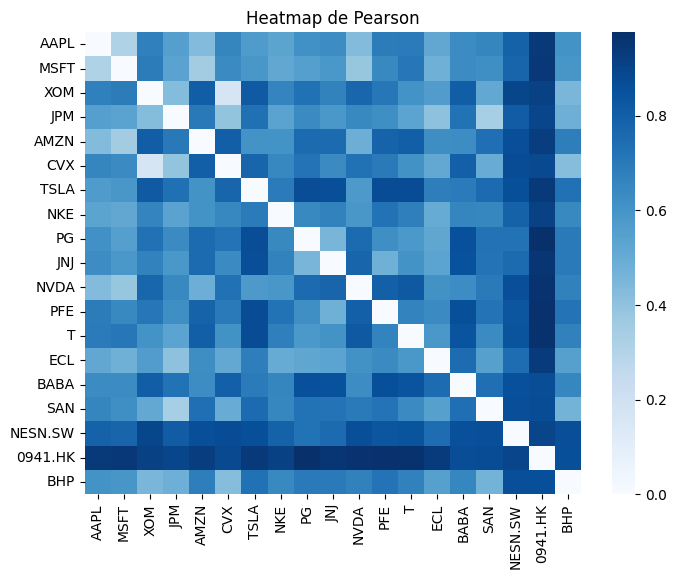

In [ ]:
# Crear un heatmap con la matriz de correlación Pearson directa
plt.figure(figsize=(8, 6))
sns.heatmap(1-pearson, cmap='Blues', annot=False)
plt.title("Heatmap de Pearson")
plt.show()

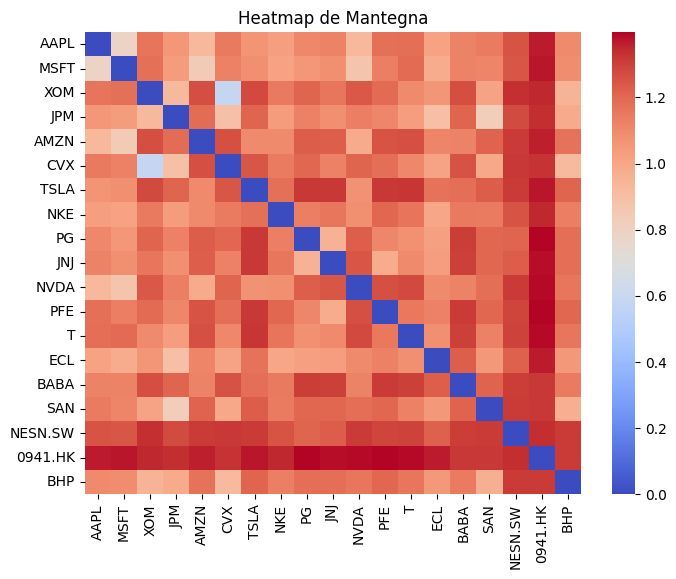

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(mantegna, cmap='coolwarm', annot=False)
plt.title("Heatmap de Mantegna")
plt.show()

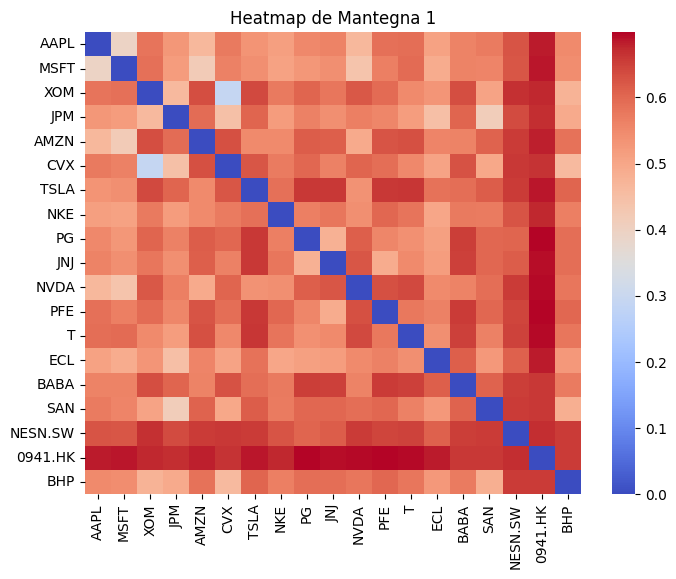

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(mantegna1, cmap='coolwarm', annot=False)
plt.title("Heatmap de Mantegna 1")
plt.show()

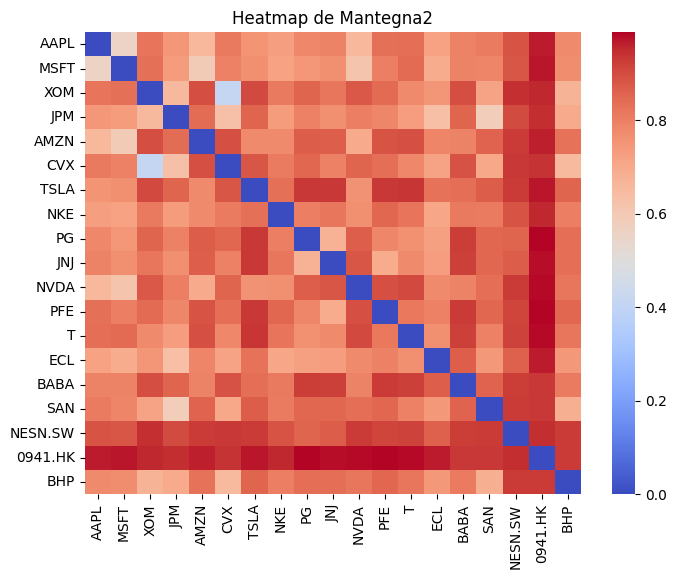

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(mantegna2, cmap='coolwarm', annot=False)
plt.title("Heatmap de Mantegna2")
plt.show()

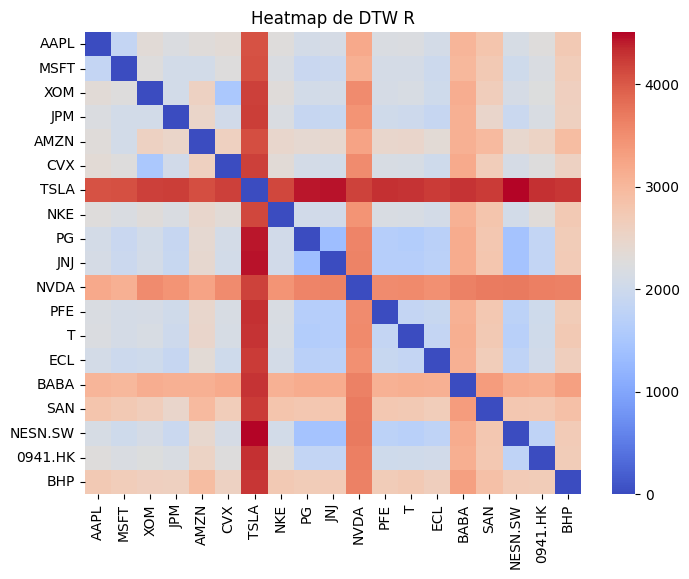

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(dtw19, cmap='coolwarm', annot=False)
plt.title("Heatmap de DTW R")
plt.show()

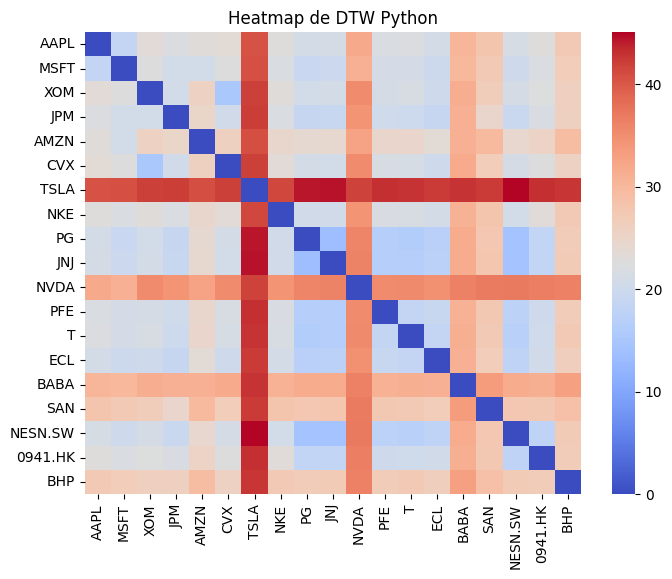

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(distance_df19, cmap='coolwarm', annot=False)
plt.title("Heatmap de DTW Python")
plt.show()

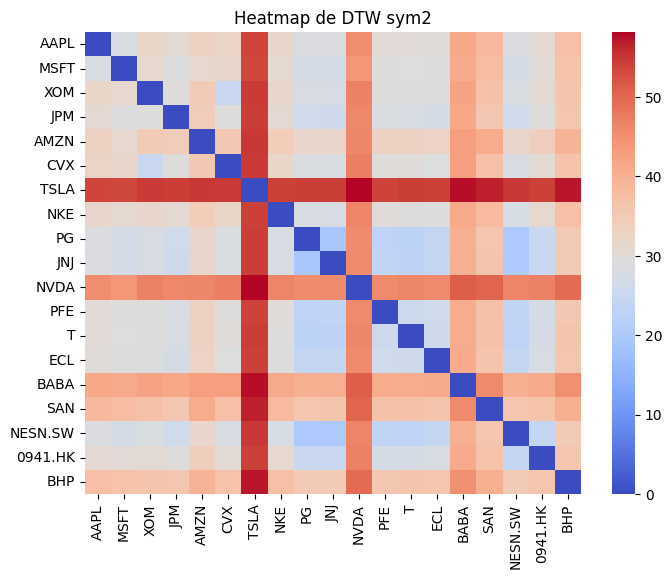

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(distance_df19_sym2, cmap='coolwarm', annot=False)
plt.title("Heatmap de DTW sym2")
plt.show()

GAP statistic

In [ ]:
# BIbliotecas necesarias
#!pip install numpy scipy sklearn

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
import random


In [ ]:
! pip install gap-stat

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gap-stat: filename=gap_stat-2.0.3-py3-none-any.whl size=6133 sha256=9b3d3f605d3768fb0a7ac5a6618c5bebd24af9f4f17b09dcb36ab1774347f392
  Stored in directory: /root/.cache/pip/wheels/e6/75/de/ee29b366258cdeccdacaff94d895b9d2ffc95a486f3b982441
Successfully built gap-stat


In [ ]:
from gap_statistic import OptimalK
import numpy as np


# Calcular el valor de GAP
optimal_k = OptimalK(parallel_backend='multiprocessing')
n_clusters = optimal_k(np.array(mantegna1), cluster_array=np.arange(1, 7))

print("Número óptimo de clusters:", n_clusters)

Número óptimo de clusters: 4


In [ ]:
n_clusters = optimal_k(np.array(mantegna), cluster_array=np.arange(1, 7))

print("Número óptimo de clusters:", n_clusters)

Número óptimo de clusters: 4


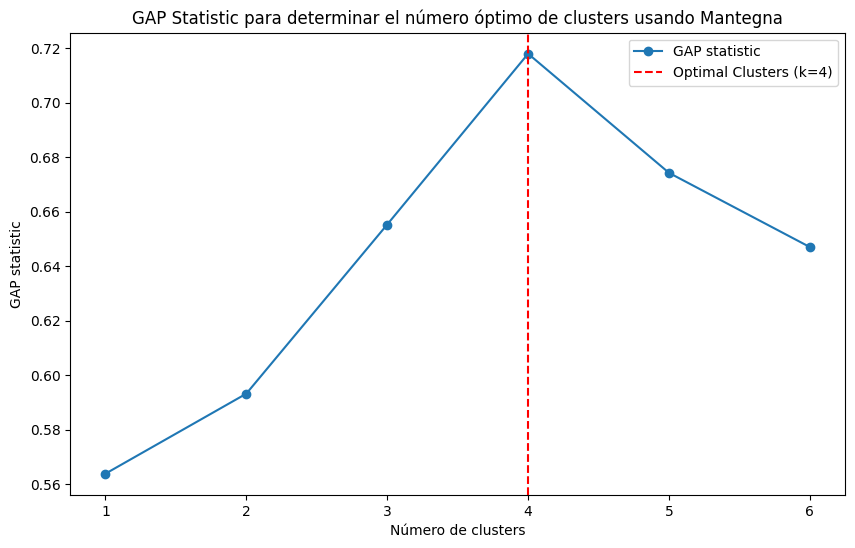

In [ ]:
# Obtener valores GAP
gaps = optimal_k.gap_df['gap_value']
k_values = optimal_k.gap_df['n_clusters']

# Graficar el GAP statistic
plt.figure(figsize=(10, 6))
plt.plot(k_values, gaps, '-o', label='GAP statistic')
plt.axvline(x=n_clusters, linestyle='--', color='red', label=f'Optimal Clusters (k={n_clusters})')
plt.xlabel('Número de clusters')
plt.ylabel('GAP statistic')
plt.title('GAP Statistic para determinar el número óptimo de clusters usando Mantegna')
plt.legend()
plt.show()


In [ ]:
n_clusters = optimal_k(np.array(dtw19), cluster_array=np.arange(1, 6))

print("Número óptimo de clusters:", n_clusters)

Número óptimo de clusters: 4


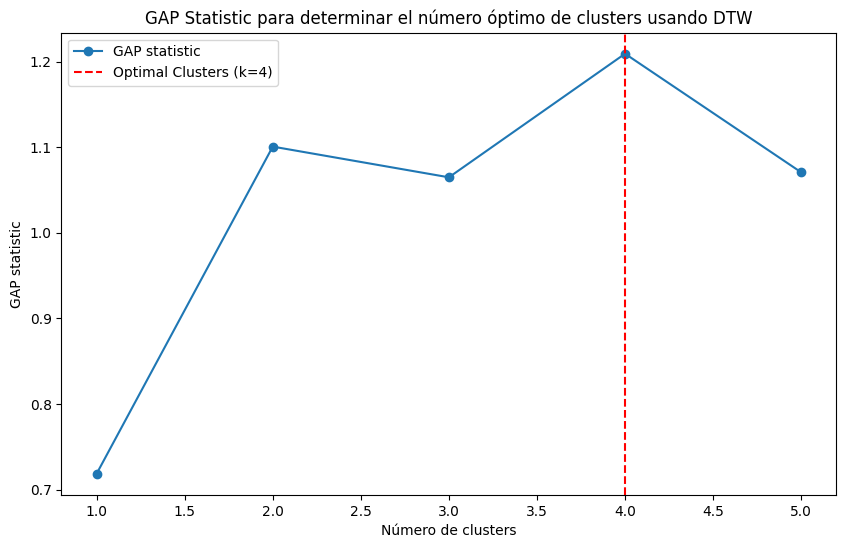

In [ ]:
# Obtener valores GAP
gaps = optimal_k.gap_df['gap_value']
k_values = optimal_k.gap_df['n_clusters']

# Graficar el GAP statistic
plt.figure(figsize=(10, 6))
plt.plot(k_values, gaps, '-o', label='GAP statistic')
plt.axvline(x=n_clusters, linestyle='--', color='red', label=f'Optimal Clusters (k={n_clusters})')
plt.xlabel('Número de clusters')
plt.ylabel('GAP statistic')
plt.title('GAP Statistic para determinar el número óptimo de clusters usando DTW')
plt.legend()
plt.show()
